In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator, DateFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.animation import FuncAnimation
import sqlite3
from datetime import datetime
import plotly.graph_objs as go
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
from plotly.subplots import make_subplots

In [2]:
# Connect to the SQLite database
conn = sqlite3.connect('data/sp500_data.db')

In [29]:
# Initialize the Dash app
app = dash.Dash(__name__)

In [53]:
# Ask the user for input
symbol = input("Enter the stock symbol: ")
start_date_str = input("Enter the start date (YYYY-MM-DD): ")
end_date_str = input("Enter the end date (YYYY-MM-DD): ")



In [4]:
# Convert the input strings to datetime objects
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
end_date = datetime.strptime(end_date_str, '%Y-%m-%d')


In [5]:
# Construct the SQL query
sql_query = f"SELECT * FROM stocks WHERE Symbol = ? AND Date >= ? AND Date <= ?"

In [ ]:
# Execute the query with user input
cursor = conn.cursor()
cursor.execute(sql_query, (symbol, start_date_str, end_date_str))
# Fetch all the rows
rowstockdata = cursor.fetchall()


In [7]:
# Create a DataFrame from the query results
columns = [description[0] for description in cursor.description]
df_stockdata = pd.DataFrame(rowstockdata, columns=columns)
df_stockdata

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Shortname
0,2022-01-03 00:00:00.000000,MMM,176.038330,177.740005,179.089996,175.839996,178.320007,1930700.0,3M Company
1,2022-01-04 00:00:00.000000,MMM,178.504471,180.229996,181.259995,178.029999,178.479996,2522200.0,3M Company
2,2022-01-05 00:00:00.000000,MMM,177.771576,179.490005,181.779999,177.000000,177.130005,2952400.0,3M Company
3,2022-01-06 00:00:00.000000,MMM,176.295822,178.000000,181.279999,177.539993,180.880005,2505400.0,3M Company
4,2022-01-07 00:00:00.000000,MMM,178.227158,179.949997,180.490005,177.220001,178.130005,2800200.0,3M Company
5,2022-01-10 00:00:00.000000,MMM,175.711487,177.410004,179.830002,176.779999,179.449997,2318000.0,3M Company
6,2022-01-11 00:00:00.000000,MMM,177.266449,178.979996,179.550003,176.419998,178.000000,2264200.0,3M Company
7,2022-01-12 00:00:00.000000,MMM,177.702225,179.419998,180.009995,178.589996,179.000000,1728500.0,3M Company
8,2022-01-13 00:00:00.000000,MMM,179.286926,181.020004,181.339996,179.029999,179.880005,2094700.0,3M Company
9,2022-01-14 00:00:00.000000,MMM,177.028748,178.740005,180.860001,177.669998,180.860001,2286100.0,3M Company


In [9]:
# Add a percent change column to the DataFrame
df_stockdata['Percent_Change'] = df_stockdata['Adj Close'].pct_change() * 100
# Replace all NaN values in the Percent_Change column with 0
df_stockdata['Percent_Change'].fillna(0, inplace=True)

In [26]:
# Print the DataFrame
df_stockdata

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Shortname,Percent_Change
0,2022-01-03 00:00:00.000000,MMM,176.038330,177.740005,179.089996,175.839996,178.320007,1930700.0,3M Company,0.000000
1,2022-01-04 00:00:00.000000,MMM,178.504471,180.229996,181.259995,178.029999,178.479996,2522200.0,3M Company,1.400911
2,2022-01-05 00:00:00.000000,MMM,177.771576,179.490005,181.779999,177.000000,177.130005,2952400.0,3M Company,-0.410575
3,2022-01-06 00:00:00.000000,MMM,176.295822,178.000000,181.279999,177.539993,180.880005,2505400.0,3M Company,-0.830140
4,2022-01-07 00:00:00.000000,MMM,178.227158,179.949997,180.490005,177.220001,178.130005,2800200.0,3M Company,1.095508
5,2022-01-10 00:00:00.000000,MMM,175.711487,177.410004,179.830002,176.779999,179.449997,2318000.0,3M Company,-1.411497
6,2022-01-11 00:00:00.000000,MMM,177.266449,178.979996,179.550003,176.419998,178.000000,2264200.0,3M Company,0.884952
7,2022-01-12 00:00:00.000000,MMM,177.702225,179.419998,180.009995,178.589996,179.000000,1728500.0,3M Company,0.245831
8,2022-01-13 00:00:00.000000,MMM,179.286926,181.020004,181.339996,179.029999,179.880005,2094700.0,3M Company,0.891774
9,2022-01-14 00:00:00.000000,MMM,177.028748,178.740005,180.860001,177.669998,180.860001,2286100.0,3M Company,-1.259533


In [10]:
# Calculate the cumulative percent change for the stock symbol
df_stockdata['Cumulative_Percent_Change'] = ((1 + df_stockdata['Adj Close'].pct_change().fillna(0)).cumprod() * 100)-100
df_stockdata

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Shortname,Percent_Change,Cumulative_Percent_Change
0,2022-01-03 00:00:00.000000,MMM,176.038330,177.740005,179.089996,175.839996,178.320007,1930700.0,3M Company,0.000000,0.000000
1,2022-01-04 00:00:00.000000,MMM,178.504471,180.229996,181.259995,178.029999,178.479996,2522200.0,3M Company,1.400911,1.400911
2,2022-01-05 00:00:00.000000,MMM,177.771576,179.490005,181.779999,177.000000,177.130005,2952400.0,3M Company,-0.410575,0.984584
3,2022-01-06 00:00:00.000000,MMM,176.295822,178.000000,181.279999,177.539993,180.880005,2505400.0,3M Company,-0.830140,0.146270
4,2022-01-07 00:00:00.000000,MMM,178.227158,179.949997,180.490005,177.220001,178.130005,2800200.0,3M Company,1.095508,1.243381
5,2022-01-10 00:00:00.000000,MMM,175.711487,177.410004,179.830002,176.779999,179.449997,2318000.0,3M Company,-1.411497,-0.185666
6,2022-01-11 00:00:00.000000,MMM,177.266449,178.979996,179.550003,176.419998,178.000000,2264200.0,3M Company,0.884952,0.697643
7,2022-01-12 00:00:00.000000,MMM,177.702225,179.419998,180.009995,178.589996,179.000000,1728500.0,3M Company,0.245831,0.945189
8,2022-01-13 00:00:00.000000,MMM,179.286926,181.020004,181.339996,179.029999,179.880005,2094700.0,3M Company,0.891774,1.845391
9,2022-01-14 00:00:00.000000,MMM,177.028748,178.740005,180.860001,177.669998,180.860001,2286100.0,3M Company,-1.259533,0.562615


In [11]:
# Construct the SQL query for the sp500 table
sql_query_sp500 = f"SELECT * FROM sp500 WHERE Date >= ? AND Date <= ?"

In [12]:
# Execute the query for the sp500 table with user input
cursor_sp500 = conn.cursor()
cursor_sp500.execute(sql_query_sp500, (start_date_str, end_date_str))
# Fetch all the rows from the sp500 table
rows_sp500 = cursor_sp500.fetchall()

In [13]:
# Create a DataFrame from the query results of the sp500 table
columns_sp500 = [description[0] for description in cursor_sp500.description]
df_sp500 = pd.DataFrame(rows_sp500, columns=columns_sp500)

In [14]:
# Add a percent change column to the DataFrame for the sp500 table
df_sp500['Percent_Change'] = df_sp500['SP500_Price'].pct_change() * 100
df_sp500

,Date,SP500_Price,Percent_Change
0,2022-01-03 00:00:00.000000,4796.56,NaN
1,2022-01-04 00:00:00.000000,4793.54,-0.062962
2,2022-01-05 00:00:00.000000,4700.58,-1.939277
3,2022-01-06 00:00:00.000000,4696.05,-0.096371
4,2022-01-07 00:00:00.000000,4677.03,-0.405021
5,2022-01-10 00:00:00.000000,4670.29,-0.144109
6,2022-01-11 00:00:00.000000,4713.07,0.916003
7,2022-01-12 00:00:00.000000,4726.35,0.281770
8,2022-01-13 00:00:00.000000,4659.03,-1.424355
9,2022-01-14 00:00:00.000000,4662.85,0.081991


In [15]:
# Replace all NaN values in the Percent_Change column with 0 for the sp500 table
df_sp500['Percent_Change'].fillna(0, inplace=True)

In [16]:
df_sp500['Cumulative_Percent_Change'] = ((1 + df_sp500['SP500_Price'].pct_change().fillna(0)).cumprod() * 100)-100
df_sp500

,Date,SP500_Price,Percent_Change,Cumulative_Percent_Change
0,2022-01-03 00:00:00.000000,4796.56,0.000000,0.000000
1,2022-01-04 00:00:00.000000,4793.54,-0.062962,-0.062962
2,2022-01-05 00:00:00.000000,4700.58,-1.939277,-2.001017
3,2022-01-06 00:00:00.000000,4696.05,-0.096371,-2.095460
4,2022-01-07 00:00:00.000000,4677.03,-0.405021,-2.491994
5,2022-01-10 00:00:00.000000,4670.29,-0.144109,-2.632512
6,2022-01-11 00:00:00.000000,4713.07,0.916003,-1.740622
7,2022-01-12 00:00:00.000000,4726.35,0.281770,-1.463757
8,2022-01-13 00:00:00.000000,4659.03,-1.424355,-2.867263
9,2022-01-14 00:00:00.000000,4662.85,0.081991,-2.787623


In [17]:
conn.close()

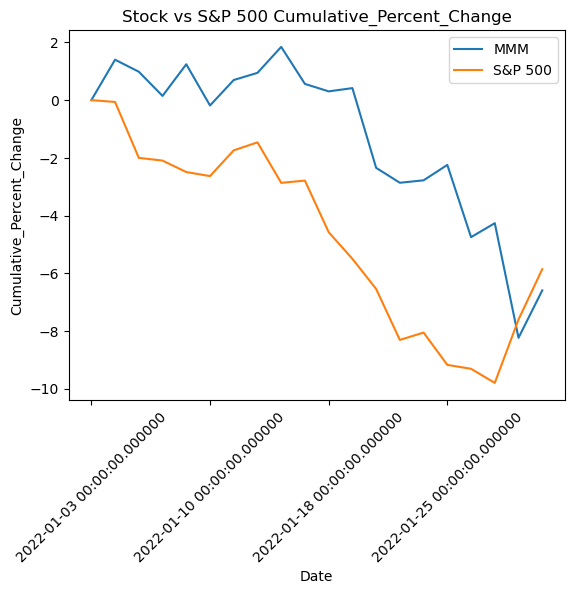

In [18]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the percent change data for the input symbol
ax.plot(df_stockdata['Date'], df_stockdata['Cumulative_Percent_Change'], label=symbol)

# Plot the percent change data for the S&P 500
ax.plot(df_sp500['Date'], df_sp500['Cumulative_Percent_Change'], label='S&P 500')

# # Set the x-axis labels to be in the format of "Month Year"
# ax.xaxis.set_major_locator(YearLocator())
# ax.xaxis.set_minor_locator(MonthLocator())
# ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))

# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative_Percent_Change')
ax.set_title('Stock vs S&P 500 Cumulative_Percent_Change')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Set the x-axis major locator to show every 5 days
ax.xaxis.set_major_locator(MultipleLocator(5))

# Display the legend
ax.legend()

# Show the plot
plt.show()

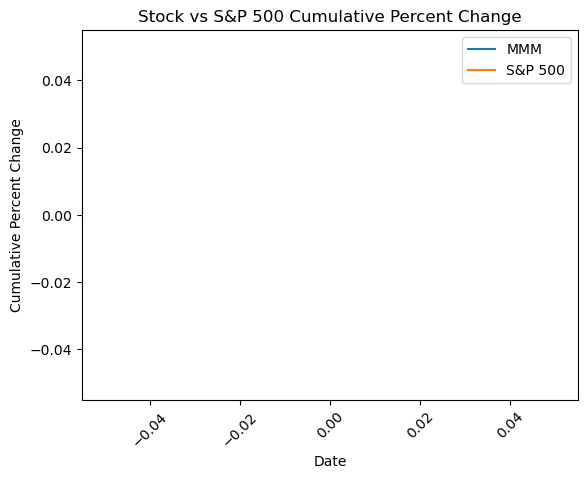

In [19]:
# Create a figure and axis
fig, ax = plt.subplots()

# Initialize the line objects for the plots
line_stock, = ax.plot([], [], label=symbol)
line_sp500, = ax.plot([], [], label='S&P 500')

# Function to update the data in the plots
def update(i):
    start_idx = max(0, i - 5)
    end_idx = i + 1
    x_stock = pd.to_datetime(df_stockdata['Date'].iloc[start_idx:end_idx])
    y_stock = df_stockdata['Cumulative_Percent_Change'].iloc[start_idx:end_idx]
    x_sp500 = pd.to_datetime(df_sp500['Date'].iloc[start_idx:end_idx])
    y_sp500 = df_sp500['Cumulative_Percent_Change'].iloc[start_idx:end_idx]

    line_stock.set_data(x_stock, y_stock)
    line_sp500.set_data(x_sp500, y_sp500)

    return line_stock, line_sp500

# Create the animation
ani = FuncAnimation(fig, update, frames=len(df_stockdata), blit=True)

# # Set the x-axis labels to be in the format of "Month Year"
# ax.xaxis.set_major_locator(YearLocator())
# ax.xaxis.set_minor_locator(MonthLocator())
# ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))

# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Percent Change')
ax.set_title('Stock vs S&P 500 Cumulative Percent Change')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# # Set the x-axis major locator to show every 5 days
# ax.xaxis.set_major_locator(MultipleLocator(5))

# Display the legend
ax.legend()

# Show the animation
plt.show()

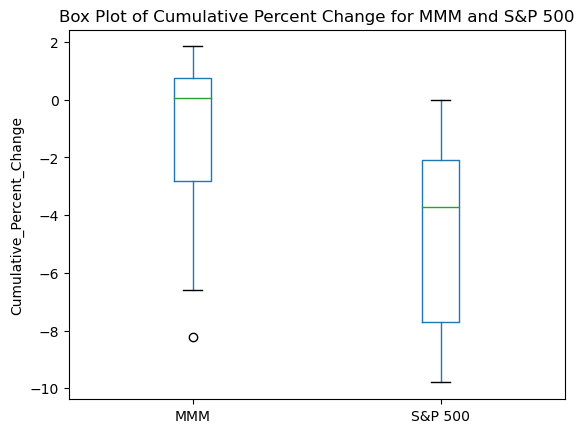

In [20]:
# Combine the percent change data into a single DataFrame
df_combined = pd.concat([df_stockdata['Cumulative_Percent_Change'], df_sp500['Cumulative_Percent_Change']], axis=1)
df_combined.columns = [symbol, 'S&P 500']

# Create a boxplot
df_combined.boxplot(grid=False)
plt.ylabel('Cumulative_Percent_Change')
plt.title(f'Box Plot of Cumulative Percent Change for {symbol} and S&P 500')
plt.show()


In [63]:
# Create a Plotly figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces for the stock and SP500
fig.add_trace(
    go.Scatter(x=df_stockdata['Date'], y=df_stockdata['Cumulative_Percent_Change'], name=f"{symbol} Cumulative Percent Change", mode='lines'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_sp500['Date'], y=df_sp500['Cumulative_Percent_Change'], name="S&P 500 Cumulative Percent Change", mode='lines'),
    secondary_y=True,
)


In [64]:
# Create a Plotly figure
fig = make_subplots(specs=[[{"secondary_y": True}]])


In [73]:
# Add dropdown list for changing time frame
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="1 Month", method="update", args=[{"visible": [True, True]}, {"title": f'{symbol} Cumulative Percent Change compared to S&P 500 from {start_date_str} to {end_date_str}', "xaxis_title": "Date", "yaxis_title": f'{symbol} Cumulative Percent Change', "yaxis2_title": "S&P 500 Cumulative Percent Change"}]),
                dict(label="6 Months", method="update", args=[{"visible": [True, True]}, {"title": f'{symbol} Cumulative Percent Change compared to S&P 500 from {start_date_str} to {end_date_str}', "xaxis_title": "Date", "yaxis_title": f'{symbol} Cumulative Percent Change', "yaxis2_title": "S&P 500 Cumulative Percent Change"}]),
                dict(label="1 Year", method="update", args=[{"visible": [True, True]}, {"title": f'{symbol} Cumulative Percent Change compared to S&P 500 from {start_date_str} to {end_date_str}', "xaxis_title": "Date", "yaxis_title": f'{symbol} Cumulative Percent Change', "yaxis2_title": "S&P 500 Cumulative Percent Change"}]),
                dict(label="3 Years", method="update", args=[{"visible": [True, True]}, {"title": f'{symbol} Cumulative Percent Change compared to S&P 500 from {start_date_str} to {end_date_str}', "xaxis_title": "Date", "yaxis_title": f'{symbol} Cumulative Percent Change', "yaxis2_title": "S&P 500 Cumulative Percent Change"}]),
                dict(label="5 Years", method="update", args=[{"visible": [True, True]}, {"title": f'{symbol} Cumulative Percent Change compared to S&P 500 from {start_date_str} to {end_date_str}', "xaxis_title": "Date", "yaxis_title": f'{symbol} Cumulative Percent Change', "yaxis2_title": "S&P 500 Cumulative Percent Change"}]),
            ]),
            direction="down",
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)


: 

In [72]:
# Add input box for updating stock symbol
fig.update_layout(
    annotations=[
        dict(
            text="Enter Stock Symbol:",
            x=0,
            xref="paper",
            y=1.05,
            yref="paper",
            align="left",
            showarrow=False
        ),
    ]
)

app.layout = html.Div([
    dcc.Graph(id='plot', figure=fig),
    dcc.Input(id='stock-symbol', value=symbol, type='text', debounce=True),
])

@app.callback(
    Output('plot', 'figure'),
    [Input('stock-symbol', 'value')]
)

SyntaxError: incomplete input (2439545826.py, line 24)